# Problem statement:

## context

The stock market has consistently prevent to be good place to invest in and save for the future there are a lot of compelling reasons to invest in stocks it can help in fighting in inflation creation create wealth and also provides some tax benefits good study returns on investments over a long. of also grow a lot more than seems possible also thanks to the power of compound interest the earlier one start investing the larger the carpose one can have for retirement overall investing in stocks can help me lives financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks to maximize earnings under any market conditions having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down it is easy to get lost in SC of financial Matrix to analyse while determining the worth of a star and doing the same for a multitude of stocks to identify the right pics for an individual can be TDS task by doing a cluster analysis one can identify staff that exhibit similar characteristics and one that exhibit minimum correlation this will help investors better analysis talks across different market segments and help protect against this that could make the portfolio vulnerable to losses.

## objective

Trade&Ahead is a financial consultancy firm that provides is customers with personalised investment strategies they have hide you as a data scientist and provided you with the data comprising stock price and some financial indicators for a few Companies listed under the New York stock exchange they have assigned you the task of analysing the data grouping the stocks based on the attributes provided and sharing insights about the characteristics of each group.

# Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

# Creating a copy of original data

In [3]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

# Checking the shape of the dataset

In [4]:
df.shape

(340, 15)

* The dataset has 340 rows and 15 columns

# Displaying few rows of the dataset

In [5]:
# viewing a random sample of the dataset
df.sample(n=10, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
125        Internet Software & Services     104.660004     16.224320   
11                                REITs      40.029999      7.578608   
248                   Personal Products      79.410004     10.660538   
238  Oil & Gas Exploration & Production      67.610001      0.865287   
336                         Restaurants      52.516175     -8.698917   
112  Oil & Gas Exploration & Production      52.130001    -21.253771   
147      Oil & Gas Equipment & Services      34.040001     -5.101751   
89                     Consumer Finance      53.619999      3.653584   
173    Asset Management & Custody Banks      33.480000      7.067477   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102    2.923698  205          70      830000000 -14454000000   
125    1.320606    8         958      592000000   3669000000   
11     1.163334   15          47       21818000    248710000   
248    0.806056   17         129      160383000    636056000   
238    1.589520   32          64     -588000000  -7829000000   
336    1.478877  142          27      159000000   1293000000   
112    2.364883    2         201      523803000     85171000   
147    1.966062    4         189     7786000000   -671000000   
89     1.159897   20          99     2288000000   2297000000   
173    1.580839   12          67      412000000    968100000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  4.065823e+08  93.089287   1.785616  
125                1.31                  2.800763e+09  79.893133   5.884467  
11                 1.52                  1.636250e+08  26.335526  -1.269332  
248                3.28                  4.913916e+08  24.070121  -2.256747  
238              -10.23                  7.652981e+08  93.089287   3.345102  
336                2.97                  4.353535e+08  17.682214  -3.838260  
112                0.56                  1.520911e+08  93.089287   9.567952  
147               -0.79                  8.493671e+08  93.089287  17.345857  
89                 5.14                  4.468872e+08  10.431906  -0.375934  
173                2.26                  4.283628e+08  14.814159   4.218620

# Checking the data types of the columns for the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

# Statistical summary of the dataset

In [7]:
df.describe()

Current Price  Price Change  Volatility         ROE  Cash Ratio  \
count     340.000000    340.000000  340.000000  340.000000  340.000000   
mean       80.862345      4.078194    1.525976   39.597059   70.023529   
std        98.055086     12.006338    0.591798   96.547538   90.421331   
min         4.500000    -47.129693    0.733163    1.000000    0.000000   
25%        38.555000     -0.939484    1.134878    9.750000   18.000000   
50%        59.705000      4.819505    1.385593   15.000000   47.000000   
75%        92.880001     10.695493    1.695549   27.000000   99.000000   
max      1274.949951     55.051683    4.580042  917.000000  958.000000   

       Net Cash Flow    Net Income  Earnings Per Share  \
count   3.400000e+02  3.400000e+02          340.000000   
mean    5.553762e+07  1.494385e+09            2.776662   
std     1.946365e+09  3.940150e+09            6.587779   
min    -1.120800e+10 -2.352800e+10          -61.200000   
25%    -1.939065e+08  3.523012e+08            1.557500   
50%     2.098000e+06  7.073360e+08            2.895000   
75%     1.698108e+08  1.899000e+09            4.620000   
max     2.076400e+10  2.444200e+10           50.090000   

       Estimated Shares Outstanding   P/E Ratio   P/B Ratio  
count                  3.400000e+02  340.000000  340.000000  
mean                   5.770283e+08   32.612563   -1.718249  
std                    8.458496e+08   44.348731   13.966912  
min                    2.767216e+07    2.935451  -76.119077  
25%                    1.588482e+08   15.044653   -4.352056  
50%                    3.096751e+08   20.819876   -1.067170  
75%                    5.731175e+08   31.764755    3.917066  
max                    6.159292e+09  528.039074  129.064585

# checking for duplicate entries

In [8]:
# let's check for duplicate observations
df.duplicated().sum()

0

# Checking for missing values

In [9]:
# checking for missing values
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values in given data

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

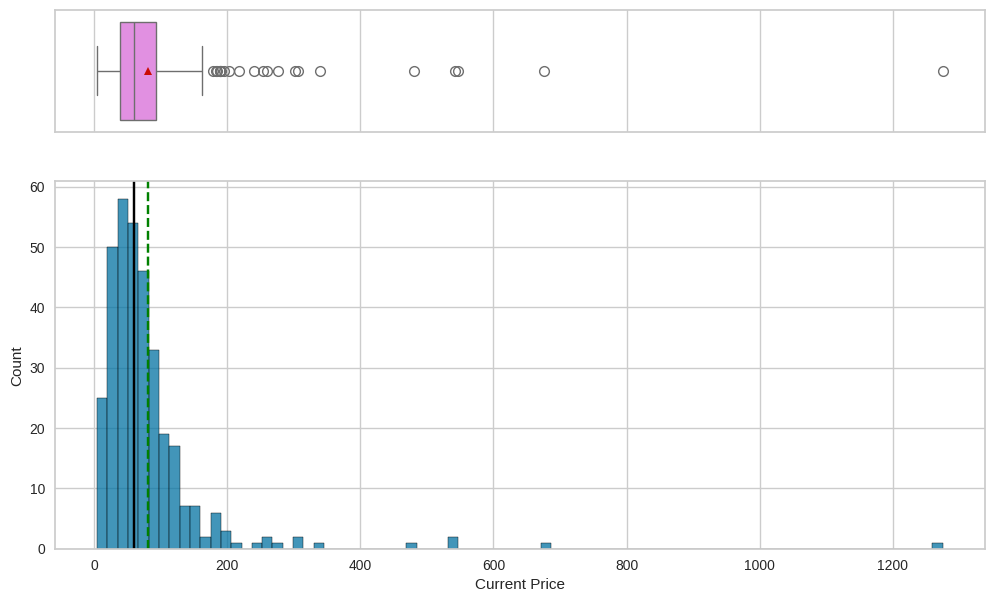

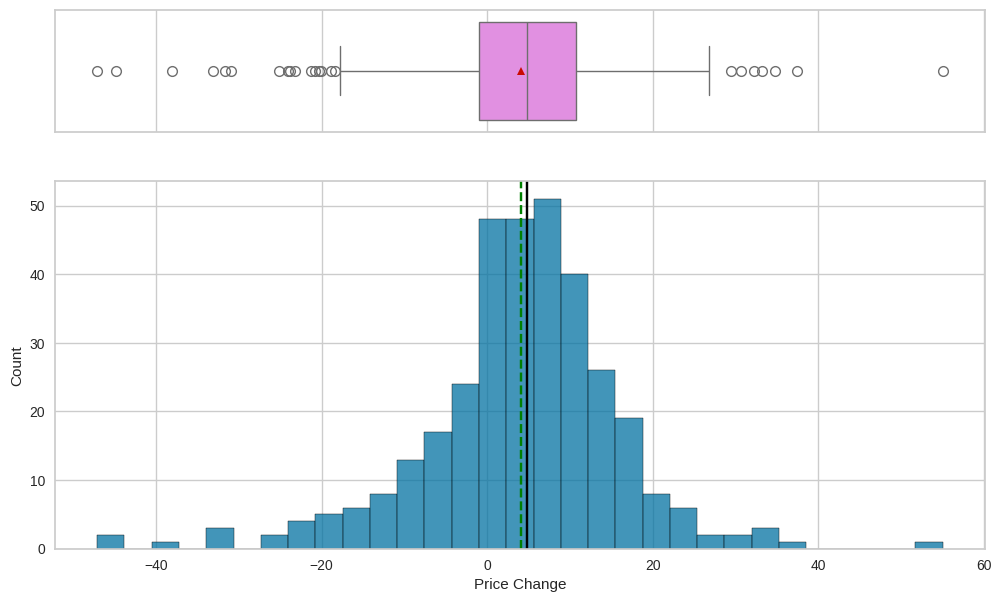

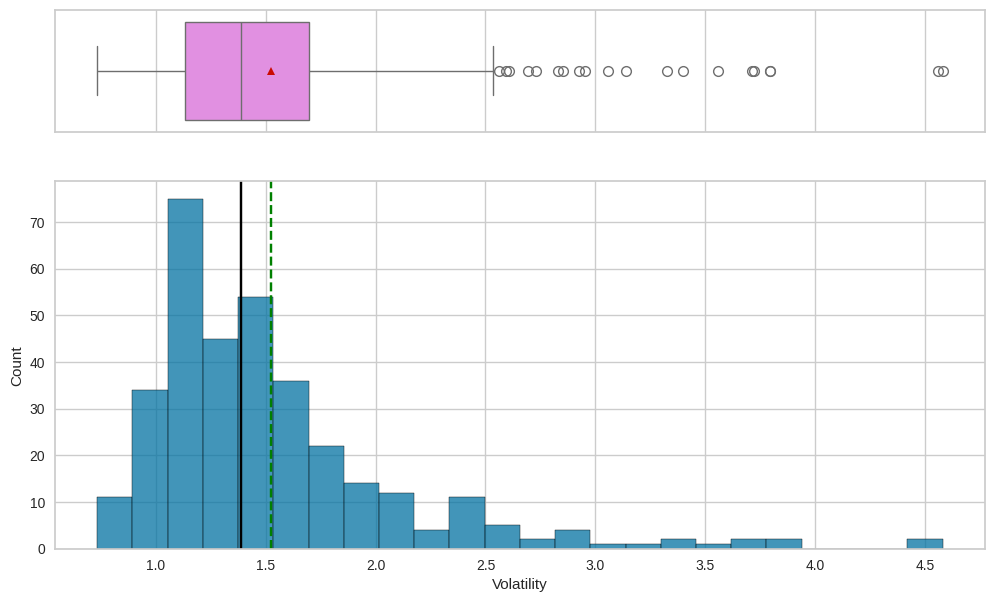

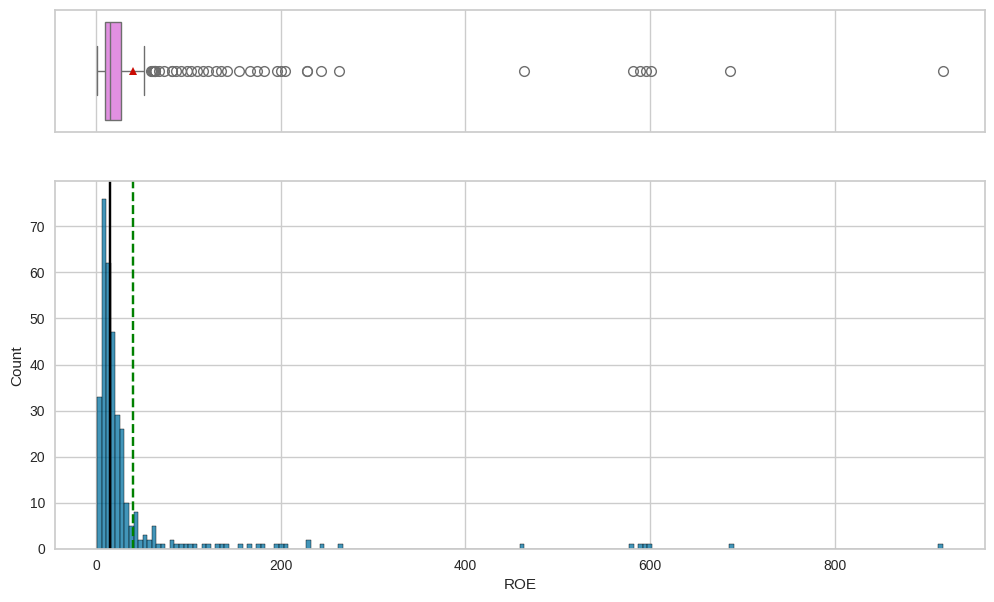

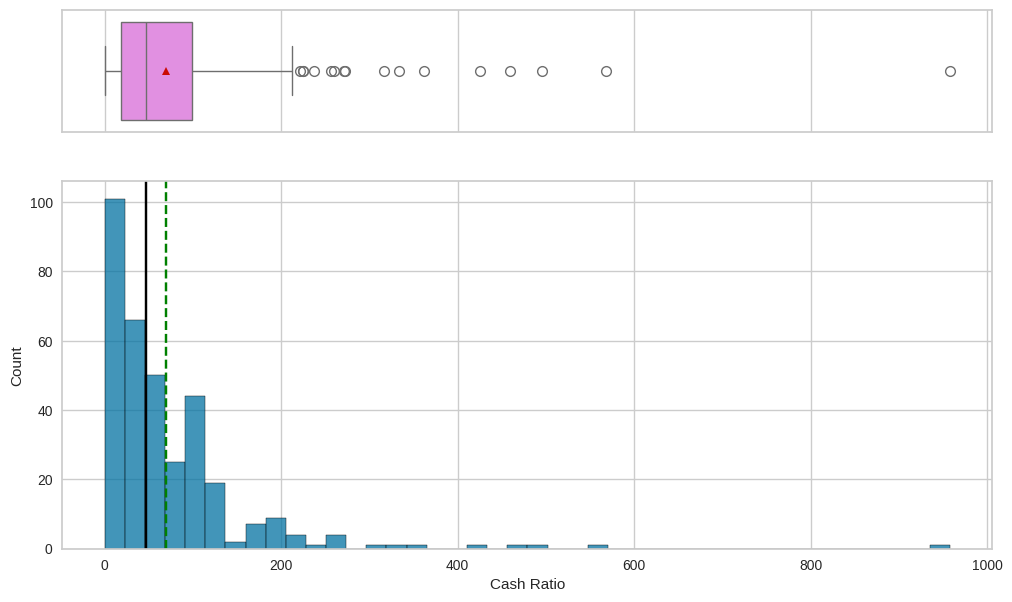

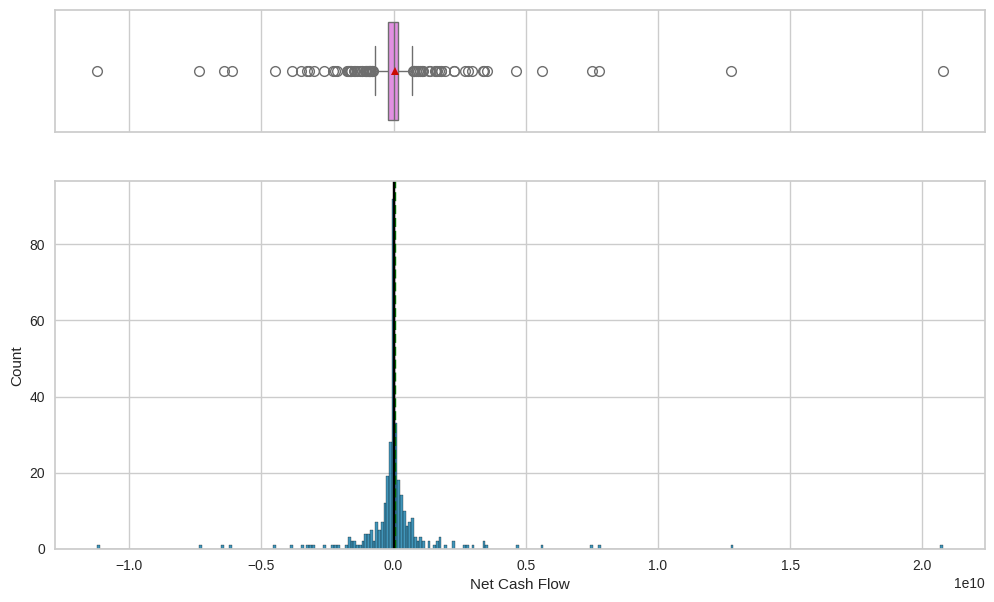

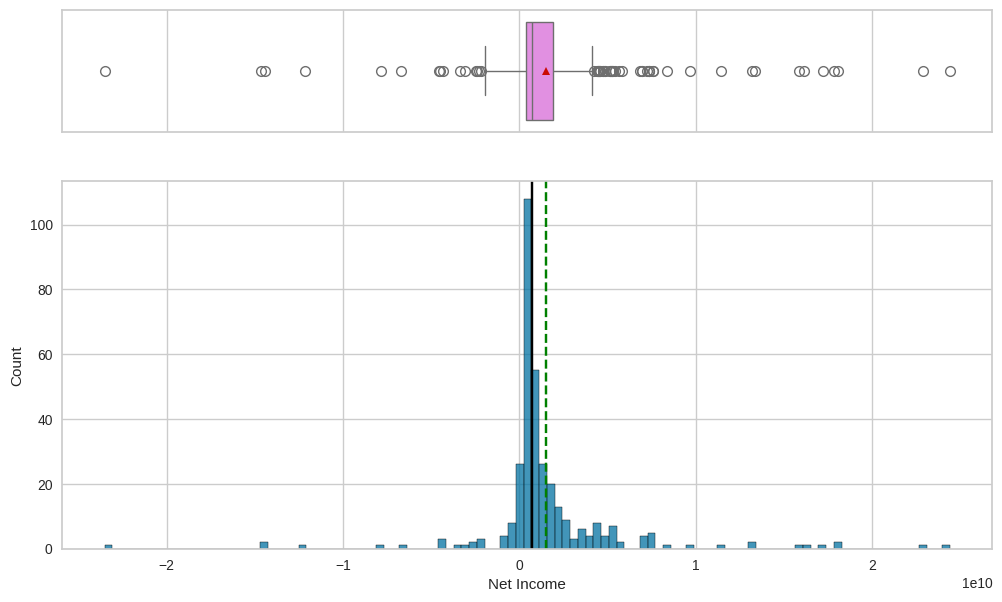

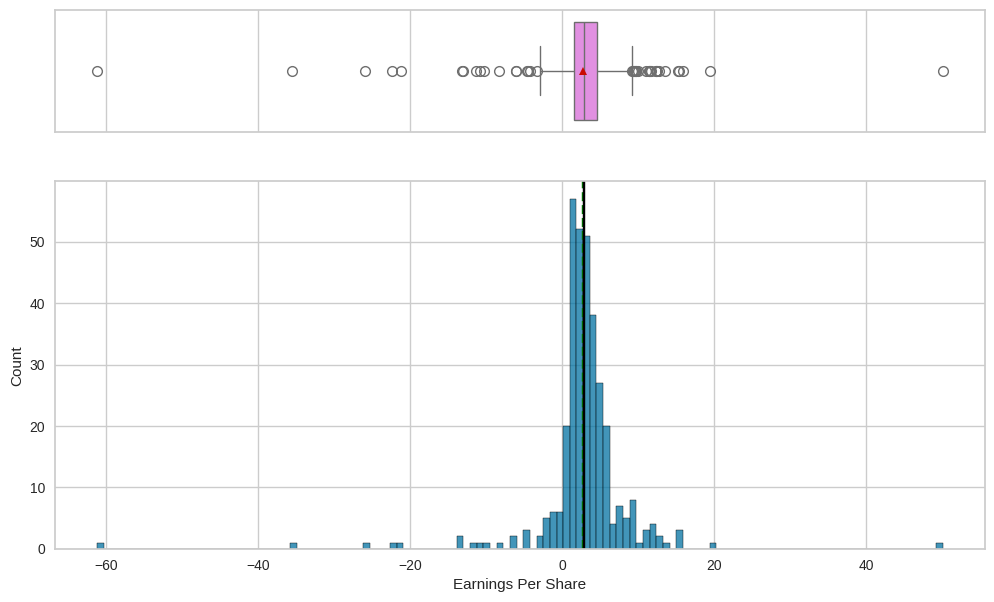

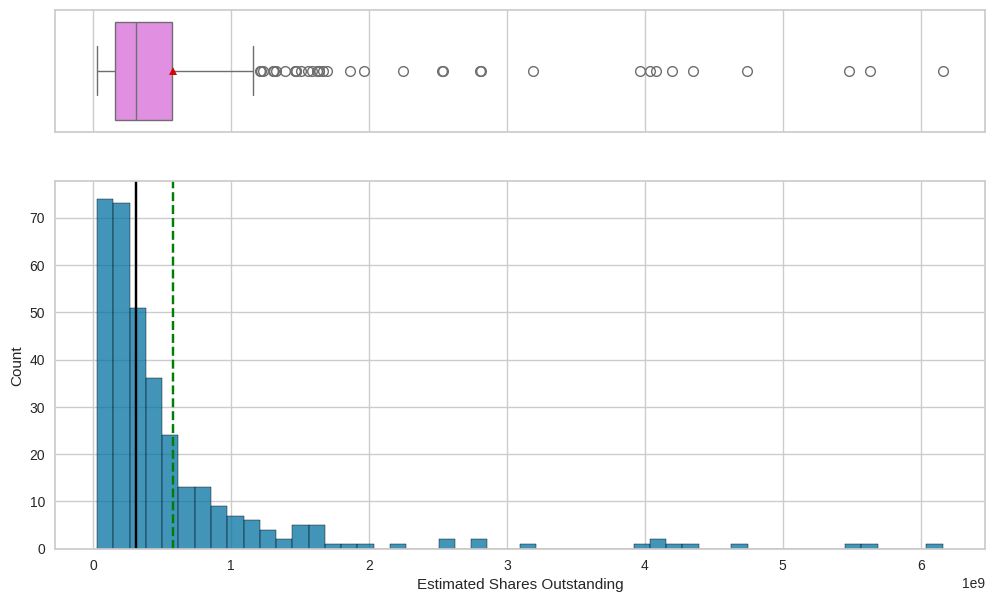

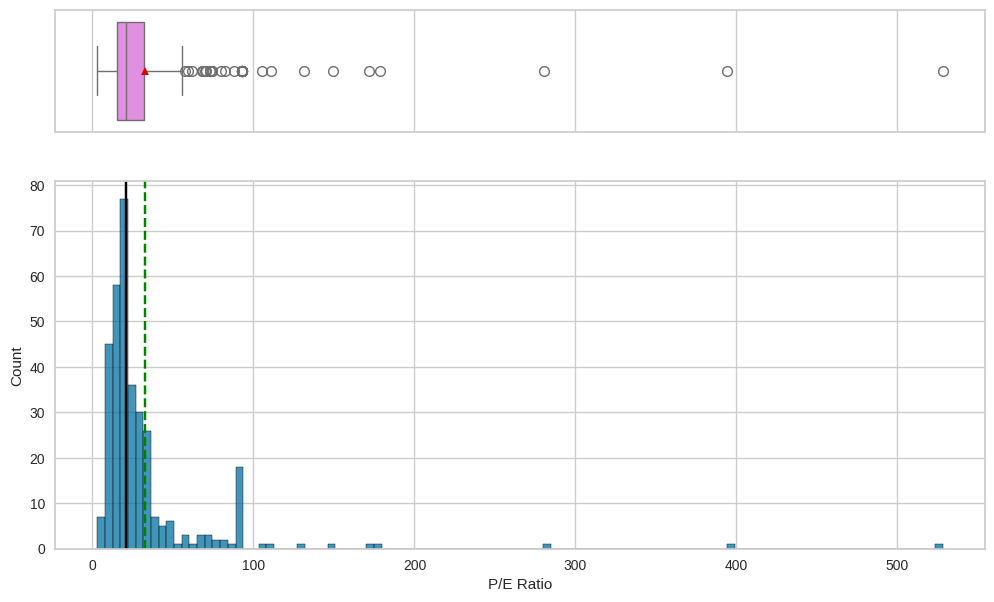

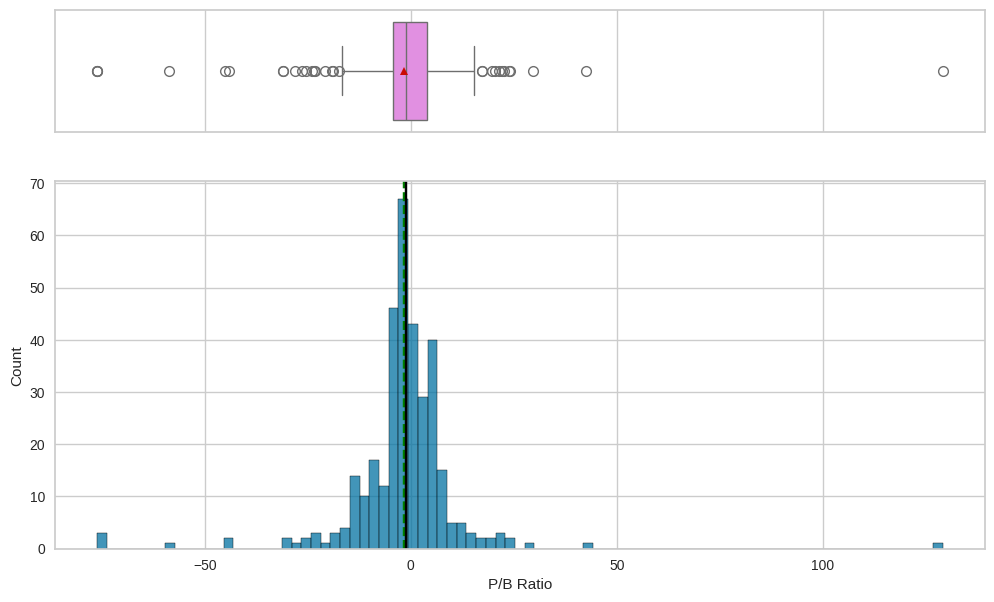

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

## Observations:

* P/E ratio, Net cash flow, Net incomeexhibit right skewed distribution indicating few companies have significantly higher values.

* Current Price, ROE, and Earnings Per Share have relatively normal distributions.

* Outliers are present for most of the columns.

* P/E Ratio and P/B Ratio have extreme outliers, suggesting that some stocks are significantly over or undervalued.

* Volatility, cash ratio, ROE, Estimated shares outstanding, P/E ratio are having right skewed distribution.

* Net Cash Flow and Net Income show outliers in both negative and positive ranges, indicating diverse financial health among companies.

# Bivariate analysis:

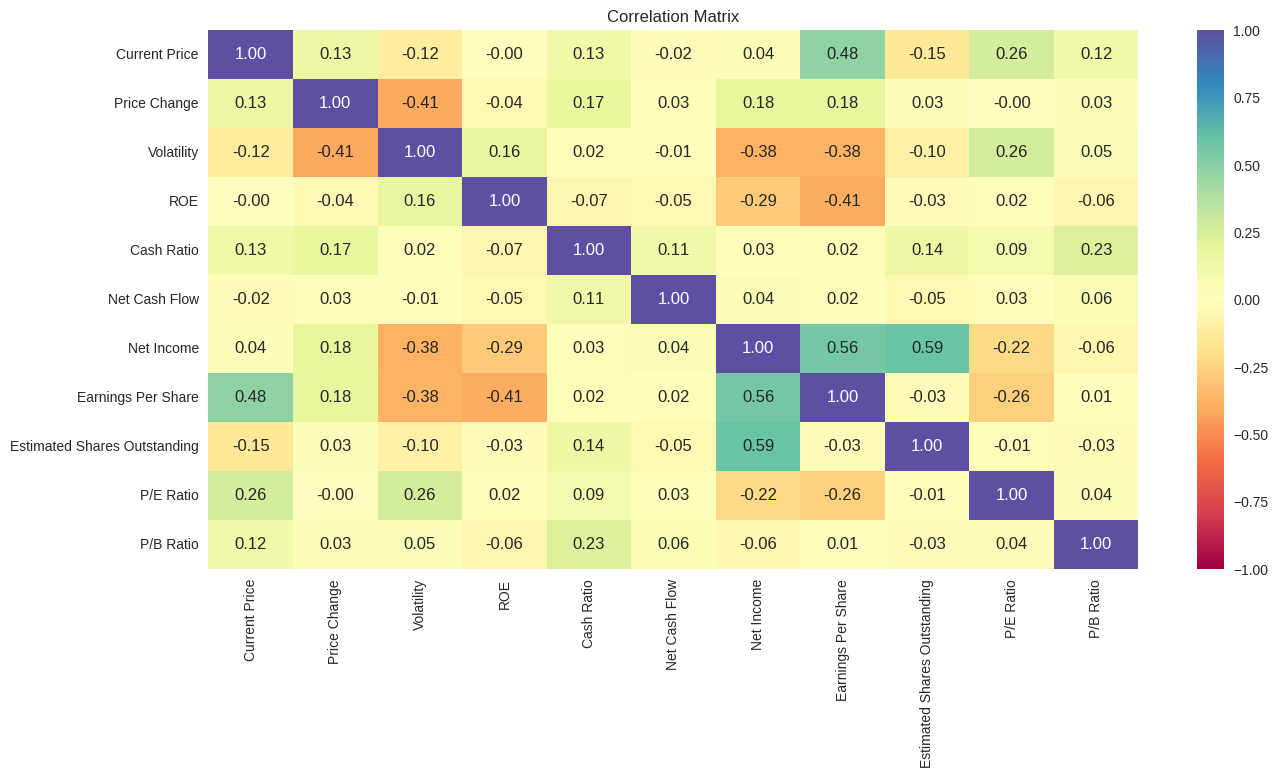

In [10]:
num_col = ["Current Price", "Price Change", "Volatility", "ROE", "Cash Ratio",
                  "Net Cash Flow", "Net Income", "Earnings Per Share", "Estimated Shares Outstanding",
                  "P/E Ratio", "P/B Ratio"]
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation Matrix")
plt.show()

* Strong positive correlation between Net Income and Earnings Per Share (EPS), as expected.
* P/E Ratio and P/B Ratio show a weak correlation

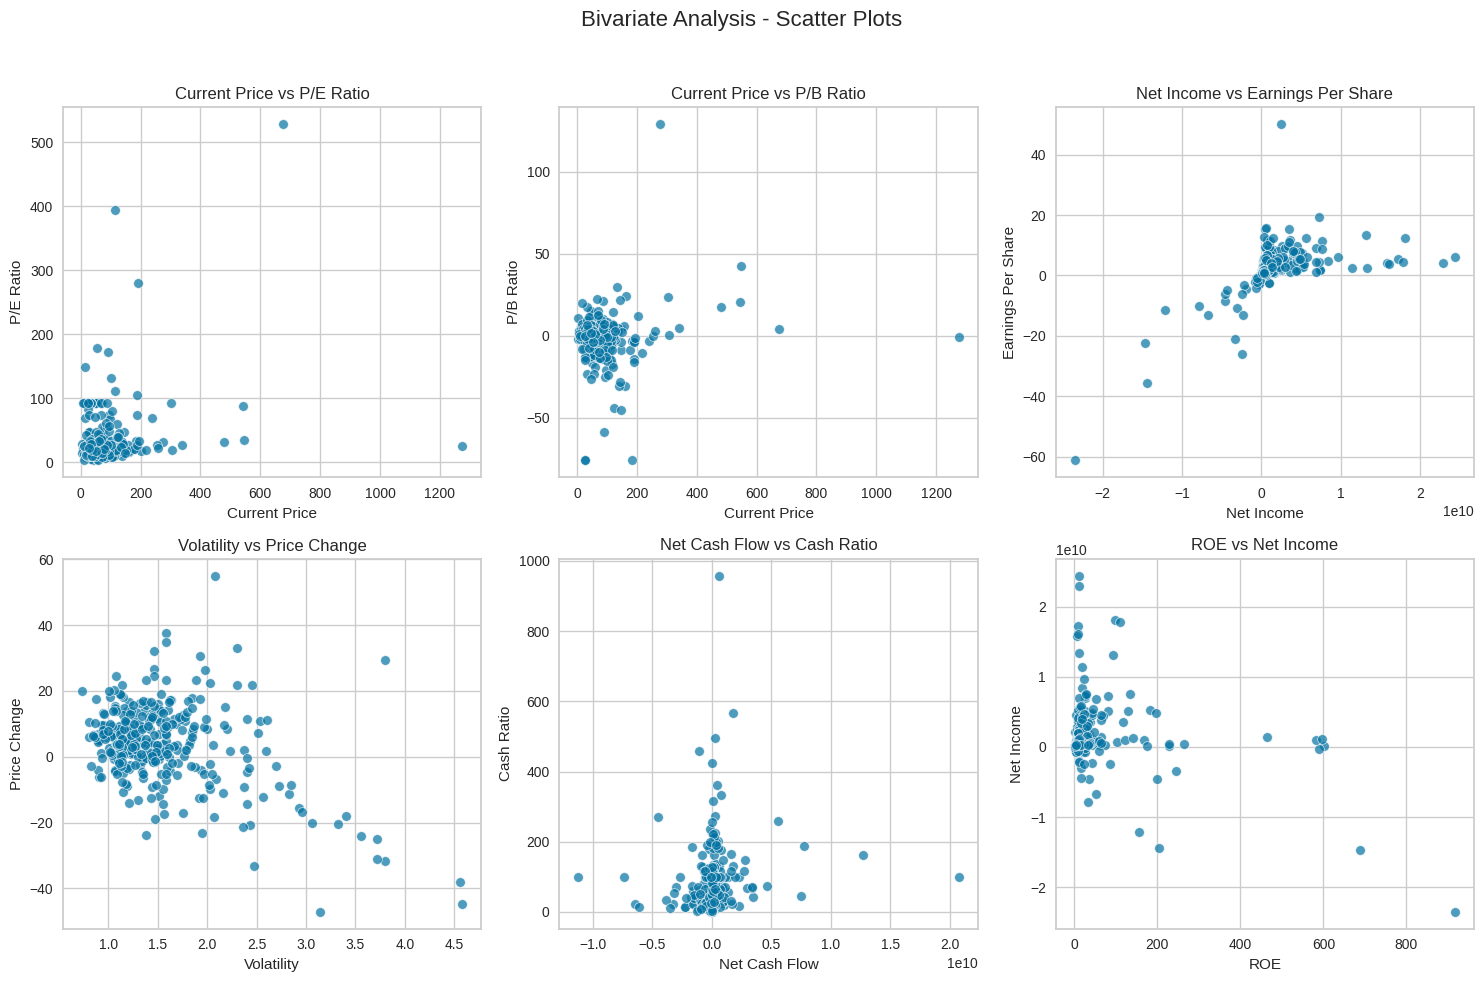

In [11]:
# Scatter plots

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Bivariate Analysis - Scatter Plots", fontsize=16)

scatter_pairs = [("Current Price", "P/E Ratio"), ("Current Price", "P/B Ratio"),
                 ("Net Income", "Earnings Per Share"), ("Volatility", "Price Change"),
                 ("Net Cash Flow", "Cash Ratio"), ("ROE", "Net Income")]

for i, (x, y) in enumerate(scatter_pairs):
    ax = axes[i // 3, i % 3]
    sns.scatterplot(x=df[x], y=df[y], alpha=0.7, ax=ax)
    ax.set_title(f"{x} vs {y}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* No strong linear trend betwwn current price and P/E ratio, indicating stock price isn't always proportional to P/E.

*  Weak relationship between Net Cash Flow and Cash Ratio, suggesting companies with higher net cash flow don't always maintain high liquidity.

* ROE  and Net Income has Positive trend, showing higher net income leads to better return on equity.

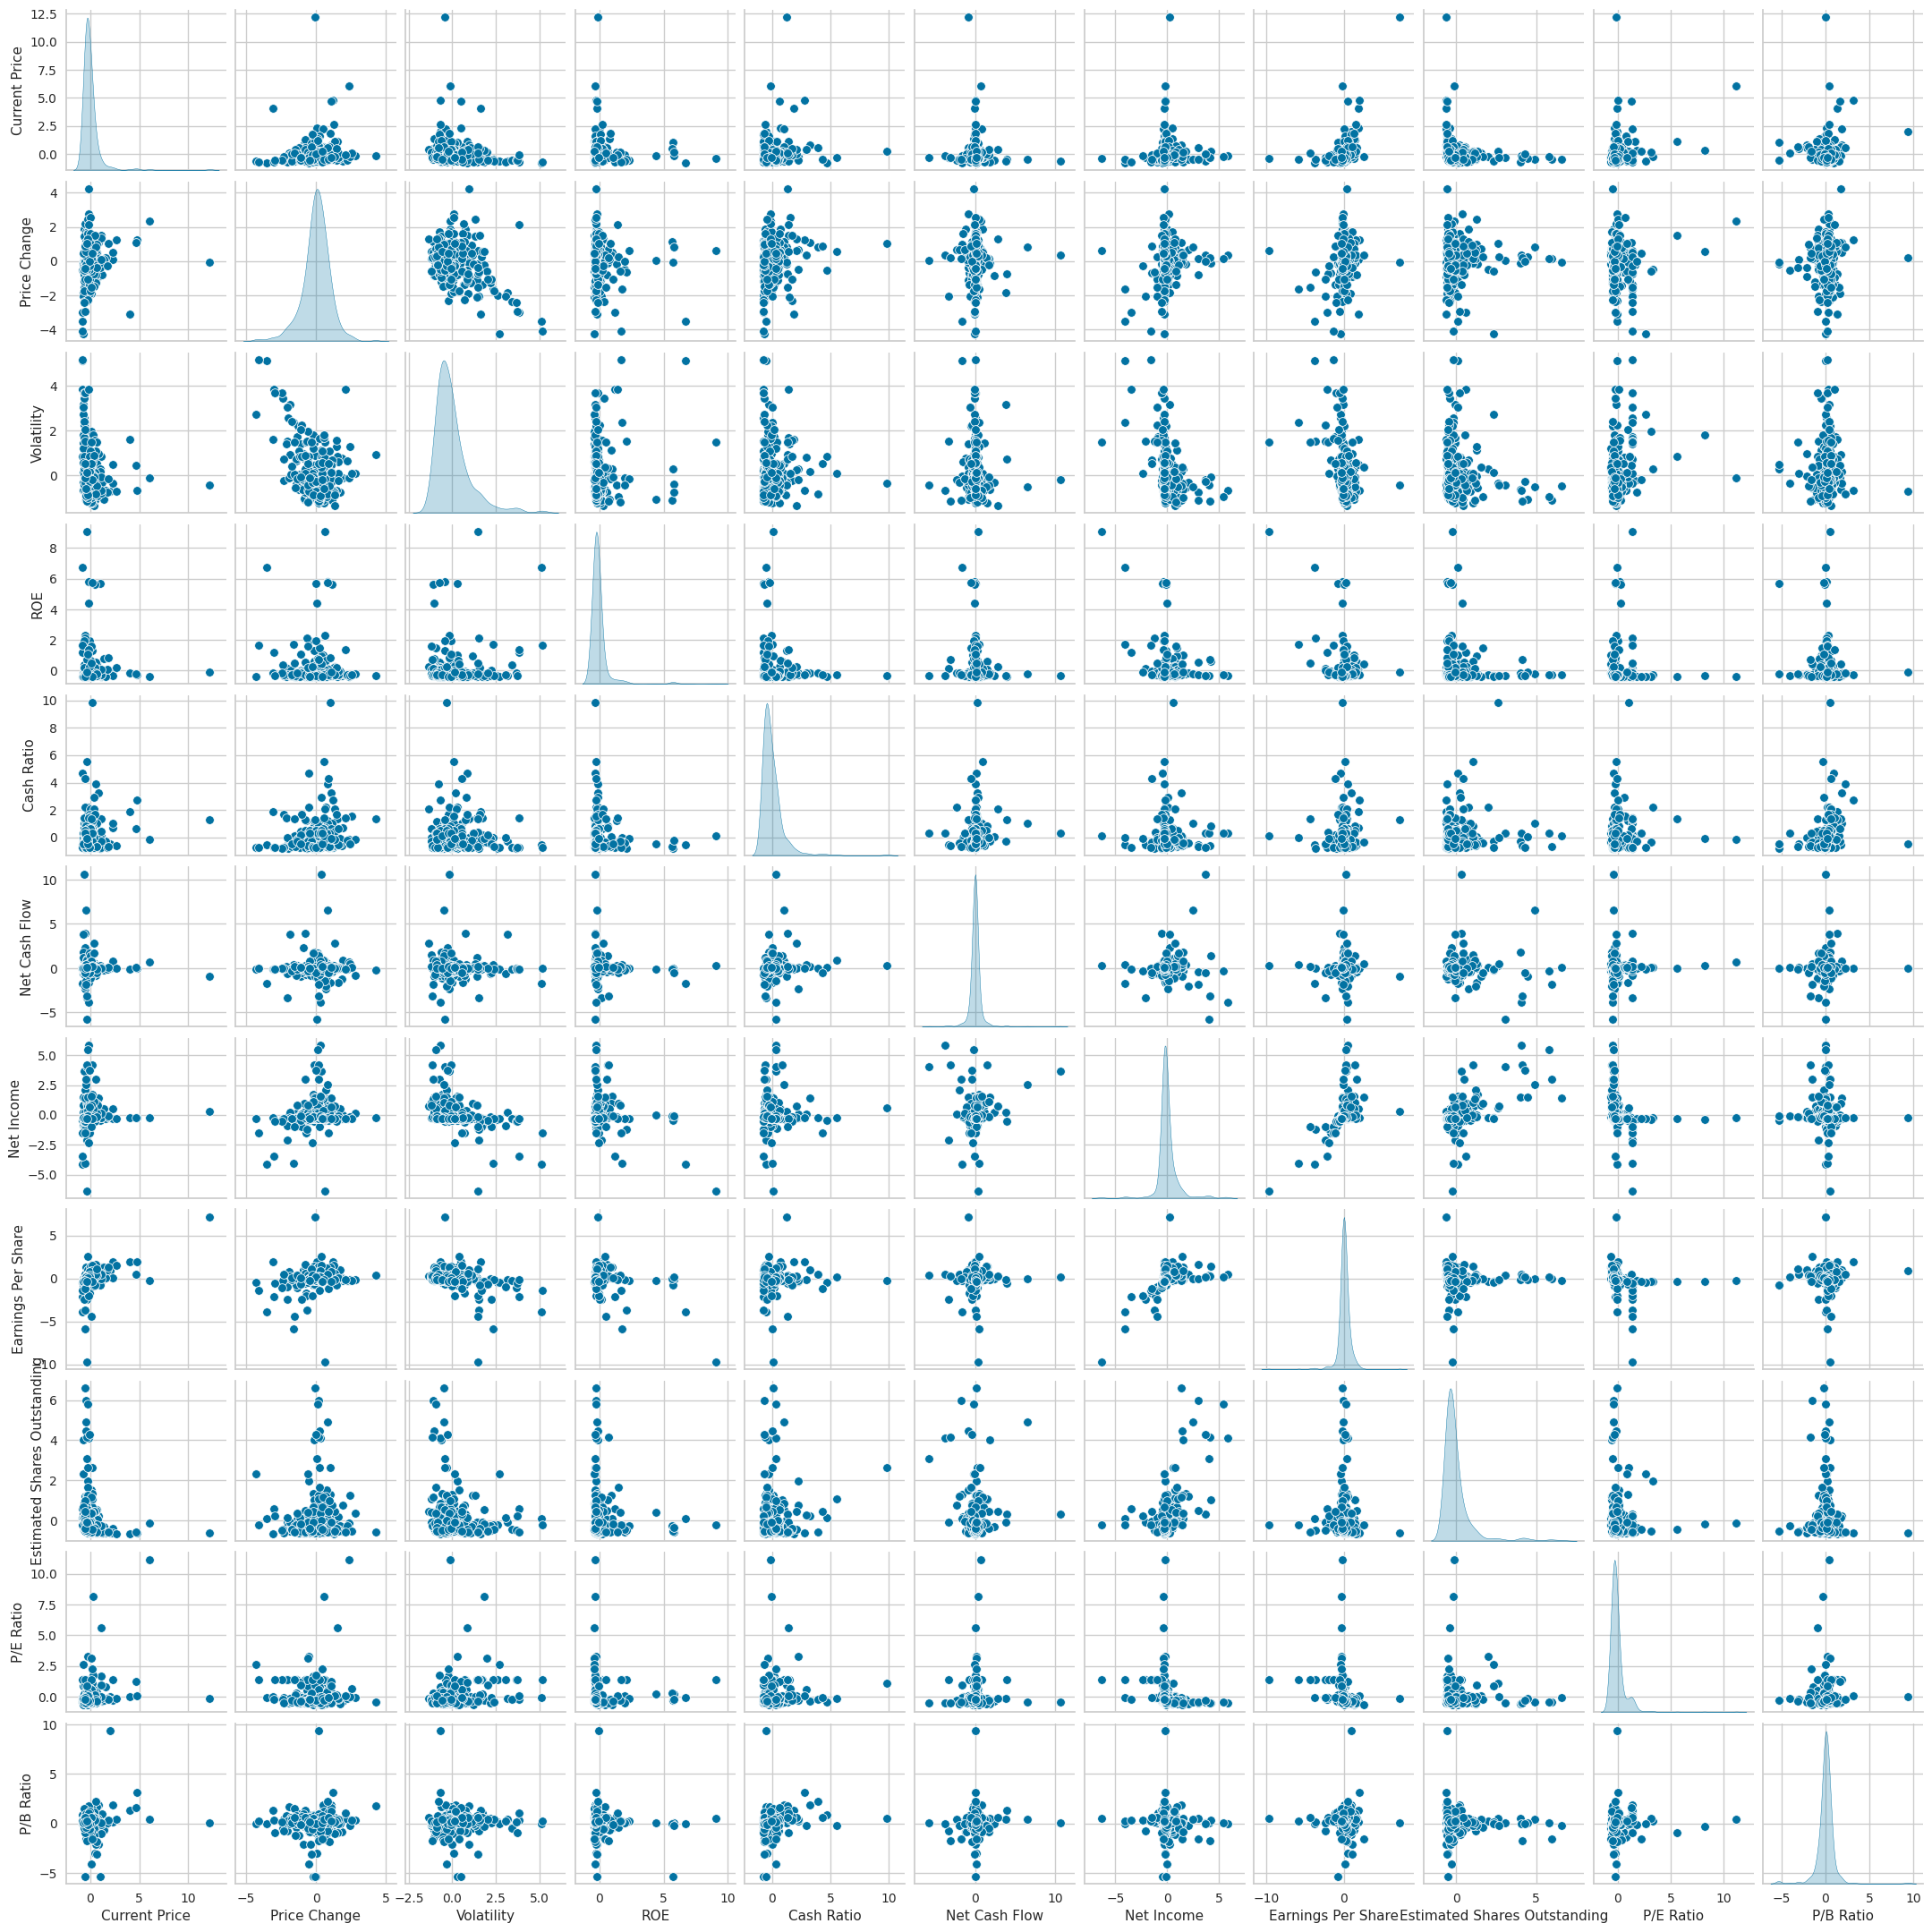

In [ ]:
# Increase the plot size using height
sns.pairplot(df, diag_kind="kde", markers="o", height=2)
plt.show()



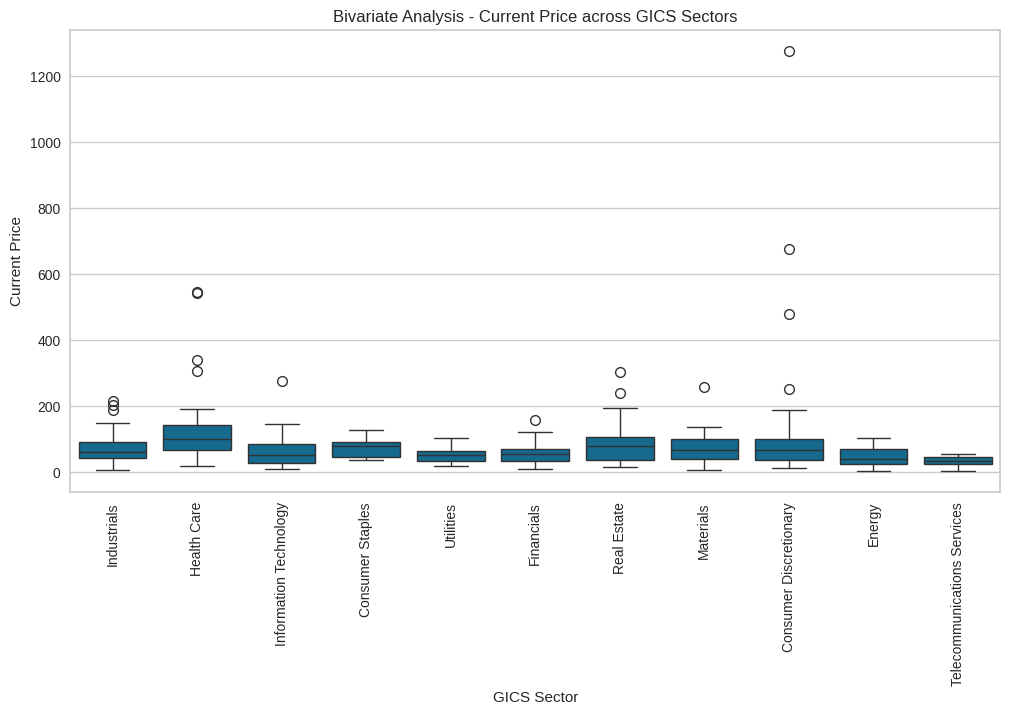

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="GICS Sector", y="Current Price", data=df)
plt.xticks(rotation=90)
plt.title("Bivariate Analysis - Current Price across GICS Sectors")
plt.show()

* Information Technology and Health Care sectors show higher stock prices on average.
Industrials and Consumer sectors have lower median stock prices.

# K-Means clustering

## Feature scaling

In [57]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

subset_scaled_df = pd.DataFrame(
    scaler.fit_transform(df.drop(["Ticker Symbol","Security","GICS Sector","GICS Sub Industry"], axis=1)),
    columns=df.drop(["Ticker Symbol","Security","GICS Sector","GICS Sub Industry"], axis=1).columns,
)
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  K_means_segments  \
0                      0.107863  -0.652487  -0.506653         -0.436550   
1                      1.250274  -0.311769  -0.504205         -0.436550   
2                      1.098021  -0.391502   0.094941         -0.436550   
3                     -0.091622   0.947148   0.424333         -0.436550   
4                      1.978399   3.293307   0.199196          2.144788   

   HC_Clusters  
0     0.162008  
1     0.162008  
2     0.162008  
3     0.162008  
4     0.162008

In [58]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Plotting elbow curve

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.377354137922532
Number of Clusters: 3 	Average Distortion: 2.3816140108256554
Number of Clusters: 4 	Average Distortion: 2.234526276973621
Number of Clusters: 5 	Average Distortion: 2.1224010114724363
Number of Clusters: 6 	Average Distortion: 2.0866313740476308
Number of Clusters: 7 	Average Distortion: 1.991398543547532
Number of Clusters: 8 	Average Distortion: 1.943256620518968


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

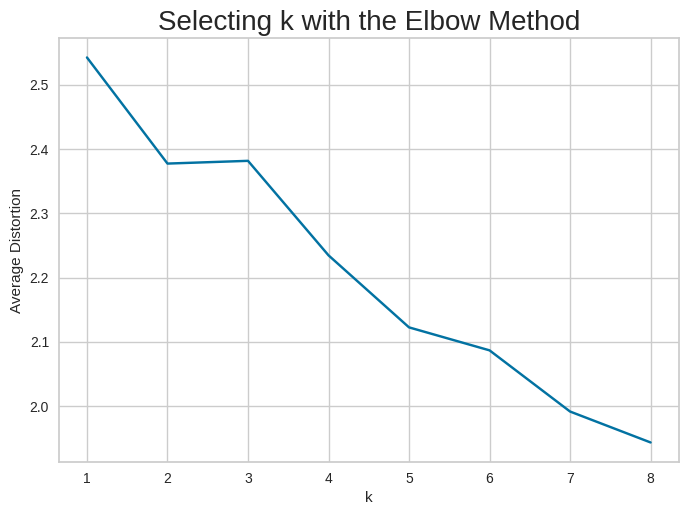

In [59]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* The appropriate value of K from above elbow curve seems to be K= 4.
## Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.27663118675595216)
For n_clusters = 4, the silhouette score is 0.3791903200700021)
For n_clusters = 5, the silhouette score is 0.43909207230796615)
For n_clusters = 6, the silhouette score is 0.40736621583467686)
For n_clusters = 7, the silhouette score is 0.11588712397685891)
For n_clusters = 8, the silhouette score is 0.09637651286244746)
For n_clusters = 9, the silhouette score is 0.1514392431563312)


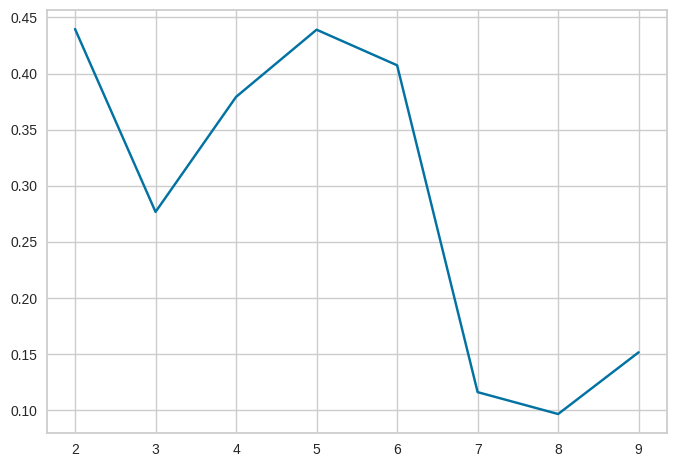

In [60]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

## Finding appropriate number of clusters

* From the silhouette scores, it seems that 4 is a good value of k.
* Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough for K=4.

In [61]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [62]:
# adding kmeans cluster labels to the original dataframe
df["K_means_segments"] = kmeans.labels_

# Cluster Profiling

In [64]:
cluster_profile = df.groupby("K_means_segments").agg({col: 'mean' for col in df.select_dtypes(include=np.number).columns})

In [26]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Net Income"].count().values
)

In [27]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

## cluster 0
* current price is 72.47
* This is the larger cluster with 272 stocks.
* ROE is 34.71%
* P/E ratio is 23.80, P/B ratio is -3.35
* Net in income is 1471488521.739130.

## cluster 1
* Highest volatility and ROE
* Least current price, Price change -16.390175 is in decling trend.
* Earnings per share are -9.849231. Those who purchases these stocks will lose the money.
* P/E ratio is 78.93 which is expensive relative to earnings.

## cluster 2
* Highest cash ratio, Earning per share, P/E ratio and P/B ratio.
* Highest current price with highest change in price, so these are highest priced stocks with more profit, there is more growth in these stocks.

## Cluster 3

* Highest Net cash flow and net income and Highest estimated share outstanding.
* second highest price change and earnins per share.


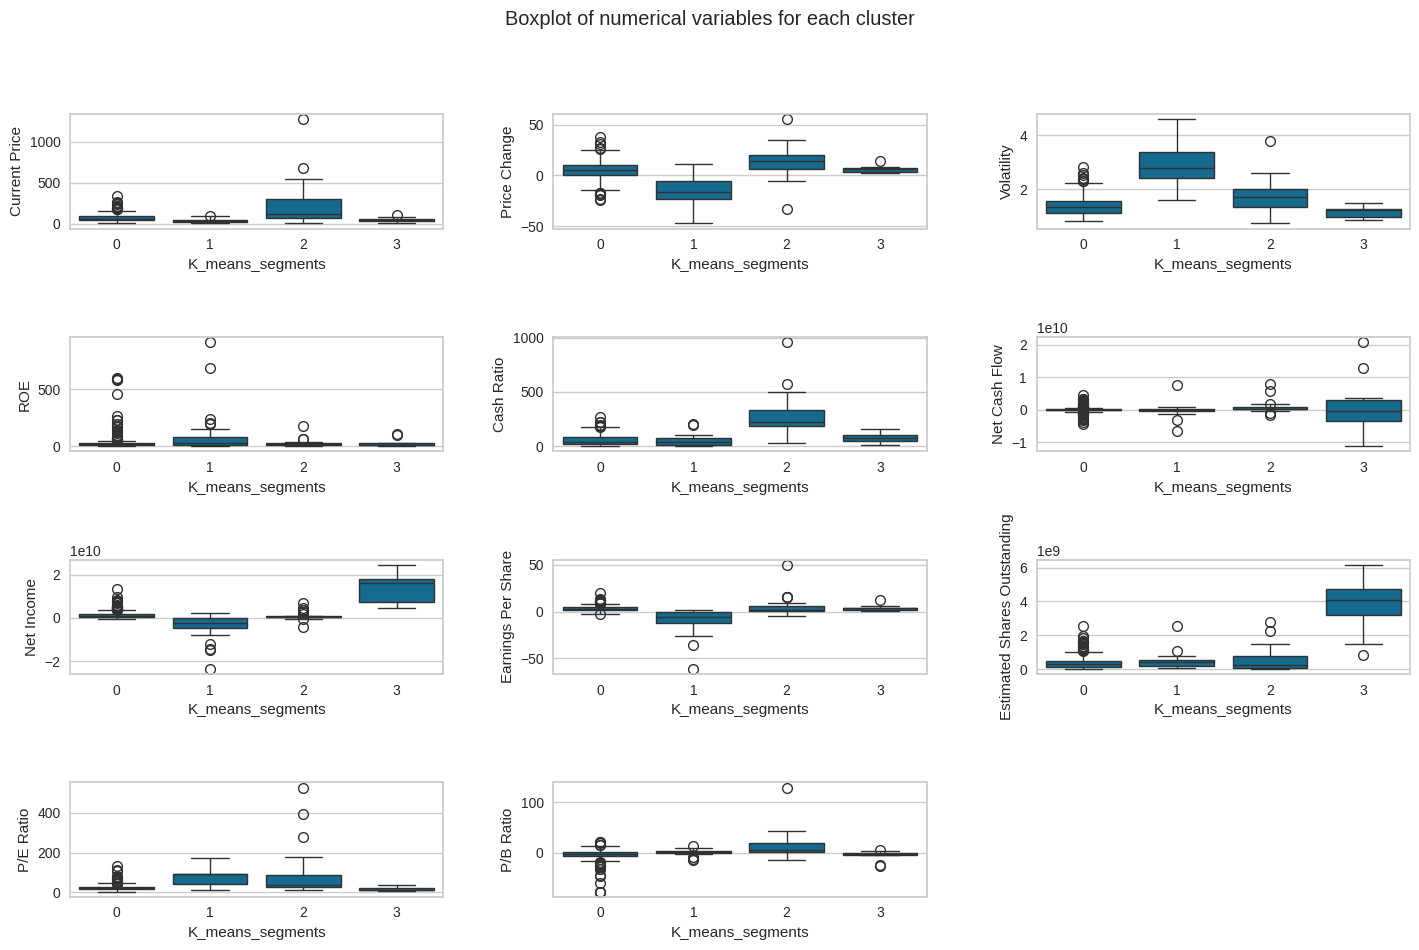

In [33]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

# Adjust the subplot grid to accommodate all variables
num_rows = (len(num_col) + 2) // 3  # Calculate rows needed
                                    # (// for integer division)
for i, variable in enumerate(num_col):
    plt.subplot(num_rows, 3, i + 1) # Adjusted grid
    sns.boxplot(data=df, x="K_means_segments", y=variable)

plt.tight_layout(pad=3.0)

<Axes: xlabel='K_means_segments'>

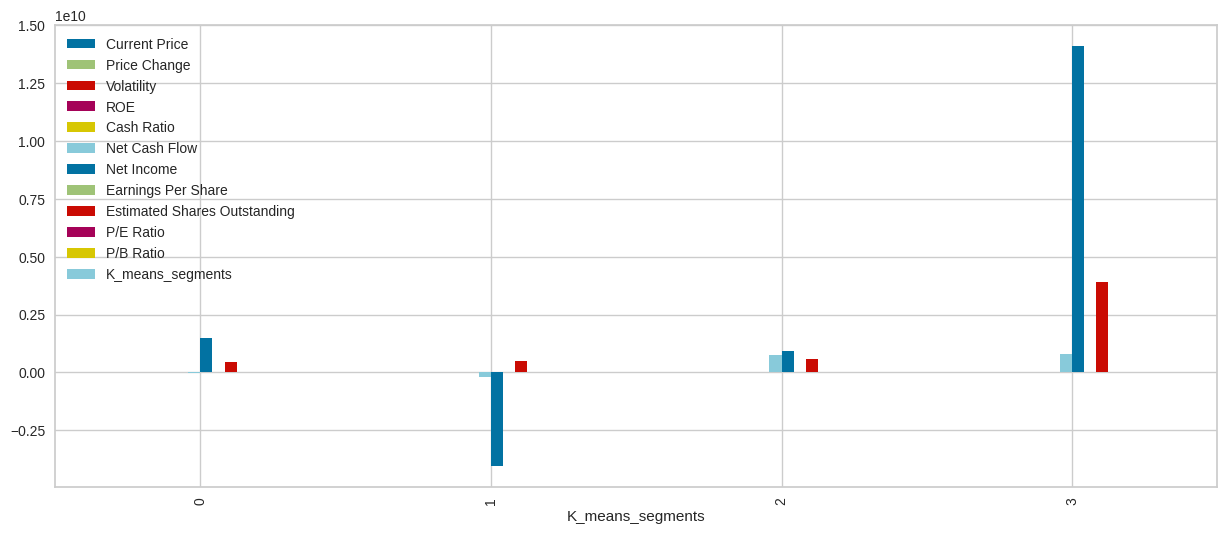

In [31]:
# Select only numerical features before calculating the mean
numerical_features = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby("K_means_segments")[numerical_features].mean()

# Now plot the bar chart
cluster_means.plot.bar(figsize=(15, 6))

# Hierarchical Clustering
## Computing Cophenetic Correlation

## Applying Hierarchical clustering with different linkage methods

In [36]:
# to compute distances
from scipy.spatial.distance import pdist
# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [37]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


## Observation
* We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.

## Plotting Dendrograms for each linkage method

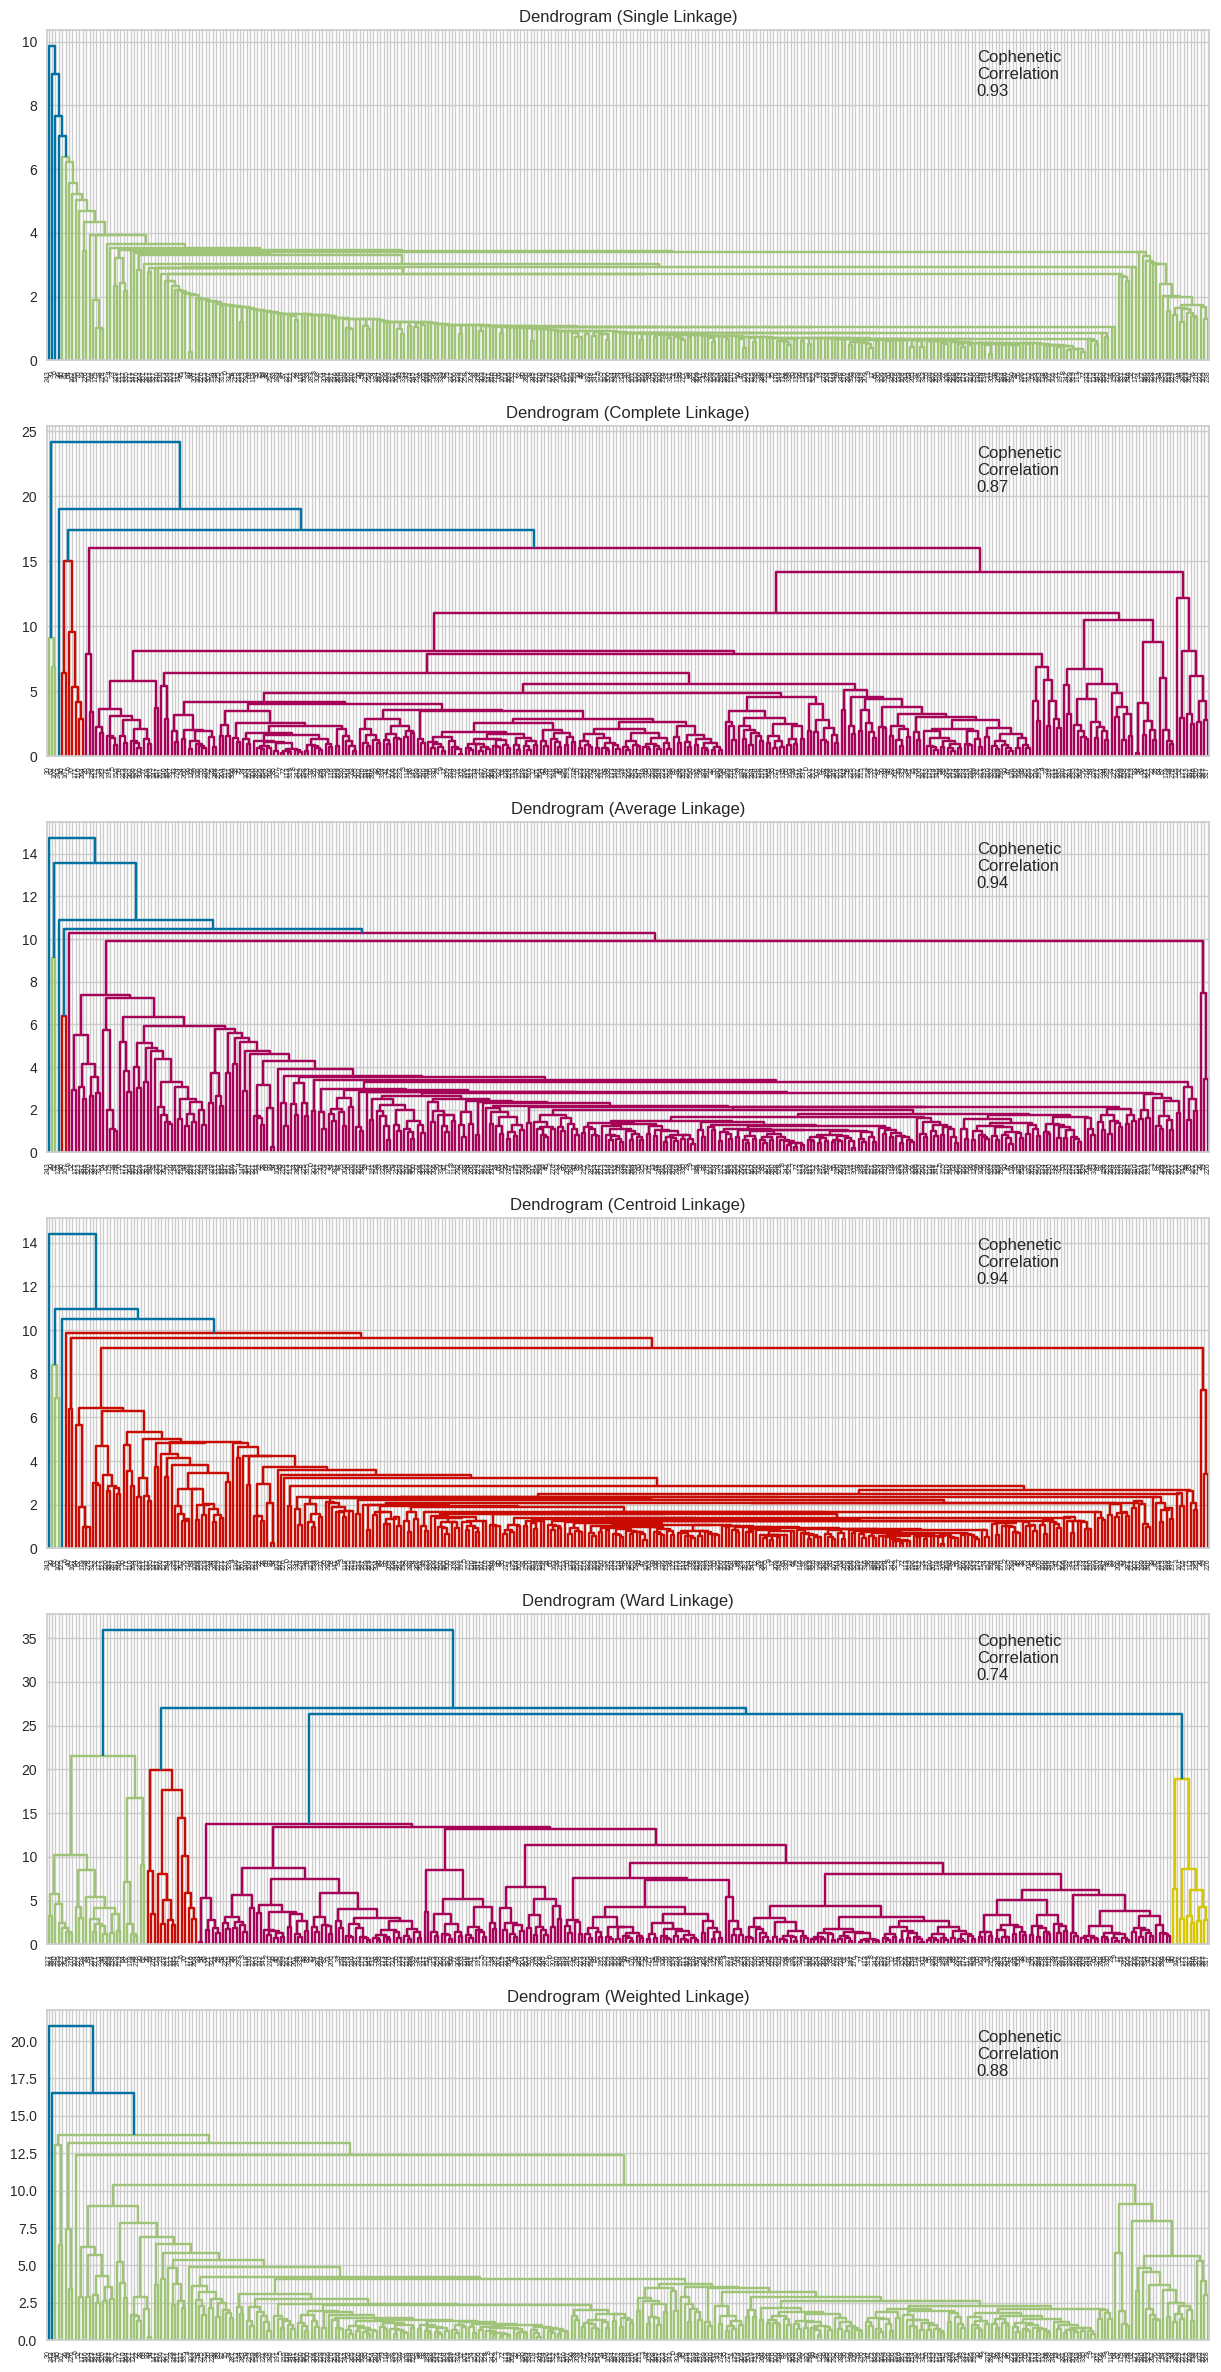

In [110]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

## checking cophenetic correlation for each linkage method

In [40]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

Linkage  Cophenetic Coefficient
0    single                0.923227
1  complete                0.787328
2   average                0.942254
3  centroid                0.931401
4      ward                0.710118
5  weighted                0.869378

* Let's see the dendrogram for Mahalanobis and Manhattan distances with average centroid linkage methods (as they gave high cophenetic correlation values).

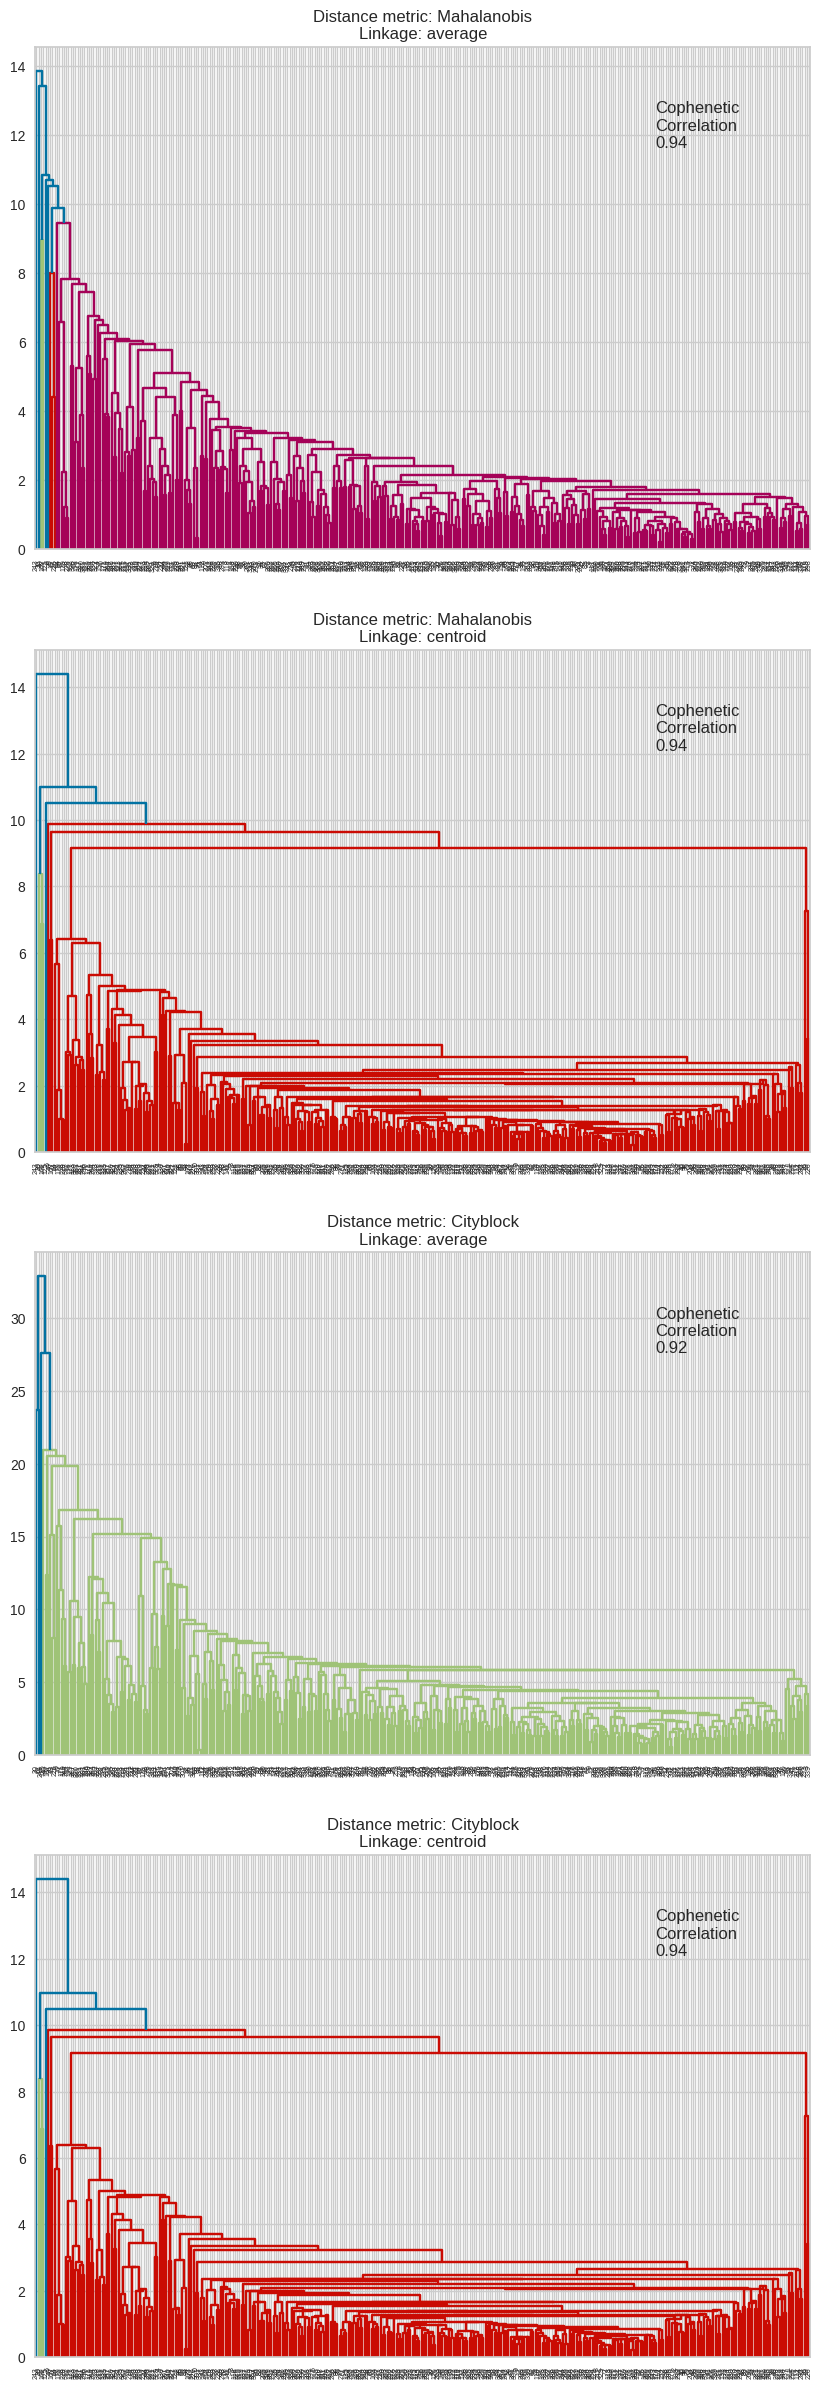

In [111]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "centroid"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        # Use 'euclidean' distance for centroid linkage
        metric = "euclidean" if lm == "centroid" else dm
        Z = linkage(subset_scaled_df, metric=metric, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

## observation:
* The cophenetic coefficient is higher for average linkage.
* 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

# Creating Model using sklearn

In [77]:
HCmodel = AgglomerativeClustering(n_clusters=3, linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [78]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [79]:
df.HC_Clusters.value_counts()

HC_Clusters
0    337
2      2
1      1
Name: count, dtype: int64

# Cluster Profiling

In [80]:
cluster_profile_df = df.groupby("HC_Clusters").agg({col: 'mean' for col in df.select_dtypes(include=np.number).columns}).mean()

In [84]:
# Create a new cluster profile DataFrame for hierarchical clustering results.
cluster_profile_hc = df.groupby("HC_Clusters").agg(
    {col: "mean" for col in df.select_dtypes(include=np.number).columns}
)

# Now, add the count column to the new DataFrame.
cluster_profile_hc["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Net Income"].count().values
)

# Display the cluster profile for hierarchical clustering.
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

In [85]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following GICS Sector are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["GICS Sector"].unique())
    print()

In cluster 0, the following GICS Sector are present:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Energy' 'Telecommunications Services']

In cluster 2, the following GICS Sector are present:
['Energy']

In cluster 1, the following GICS Sector are present:
['Consumer Discretionary']



* We see that there are 2 clusters of one GIS Sector, 1 cluster of 11 GIS Sectors are grouped into this cluster. This clustering does not look good as the clusters do not have enough variability.

Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [87]:
HCmodel = AgglomerativeClustering(n_clusters=4, linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

In [88]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [91]:
# Select only numerical features before calculating the mean
numerical_features = df.select_dtypes(include=np.number).columns
cluster_profile = df.groupby("HC_Clusters")[numerical_features].mean()

In [93]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Net Income"].count().values
)

In [99]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["GICS Sector"].nunique(),
        "GICS Sectors in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["GICS Sector"].unique())
    print("-" * 100, "\n")

The 11 GICS Sectors in cluster 3 are:
['Industrials' 'Health Care' 'Information Technology' 'Consumer Staples'
 'Utilities' 'Financials' 'Real Estate' 'Materials'
 'Consumer Discretionary' 'Telecommunications Services' 'Energy']
---------------------------------------------------------------------------------------------------- 

The 6 GICS Sectors in cluster 1 are:
['Information Technology' 'Health Care' 'Consumer Discretionary'
 'Real Estate' 'Telecommunications Services' 'Consumer Staples']
---------------------------------------------------------------------------------------------------- 

The 7 GICS Sectors in cluster 0 are:
['Industrials' 'Energy' 'Consumer Discretionary' 'Consumer Staples'
 'Materials' 'Financials' 'Information Technology']
---------------------------------------------------------------------------------------------------- 

The 7 GICS Sectors in cluster 2 are:
['Financials' 'Consumer Discretionary' 'Information Technology'
 'Consumer Staples' 'Health Care' 'Te

## Now the clusters seem to have more variability.

In [100]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

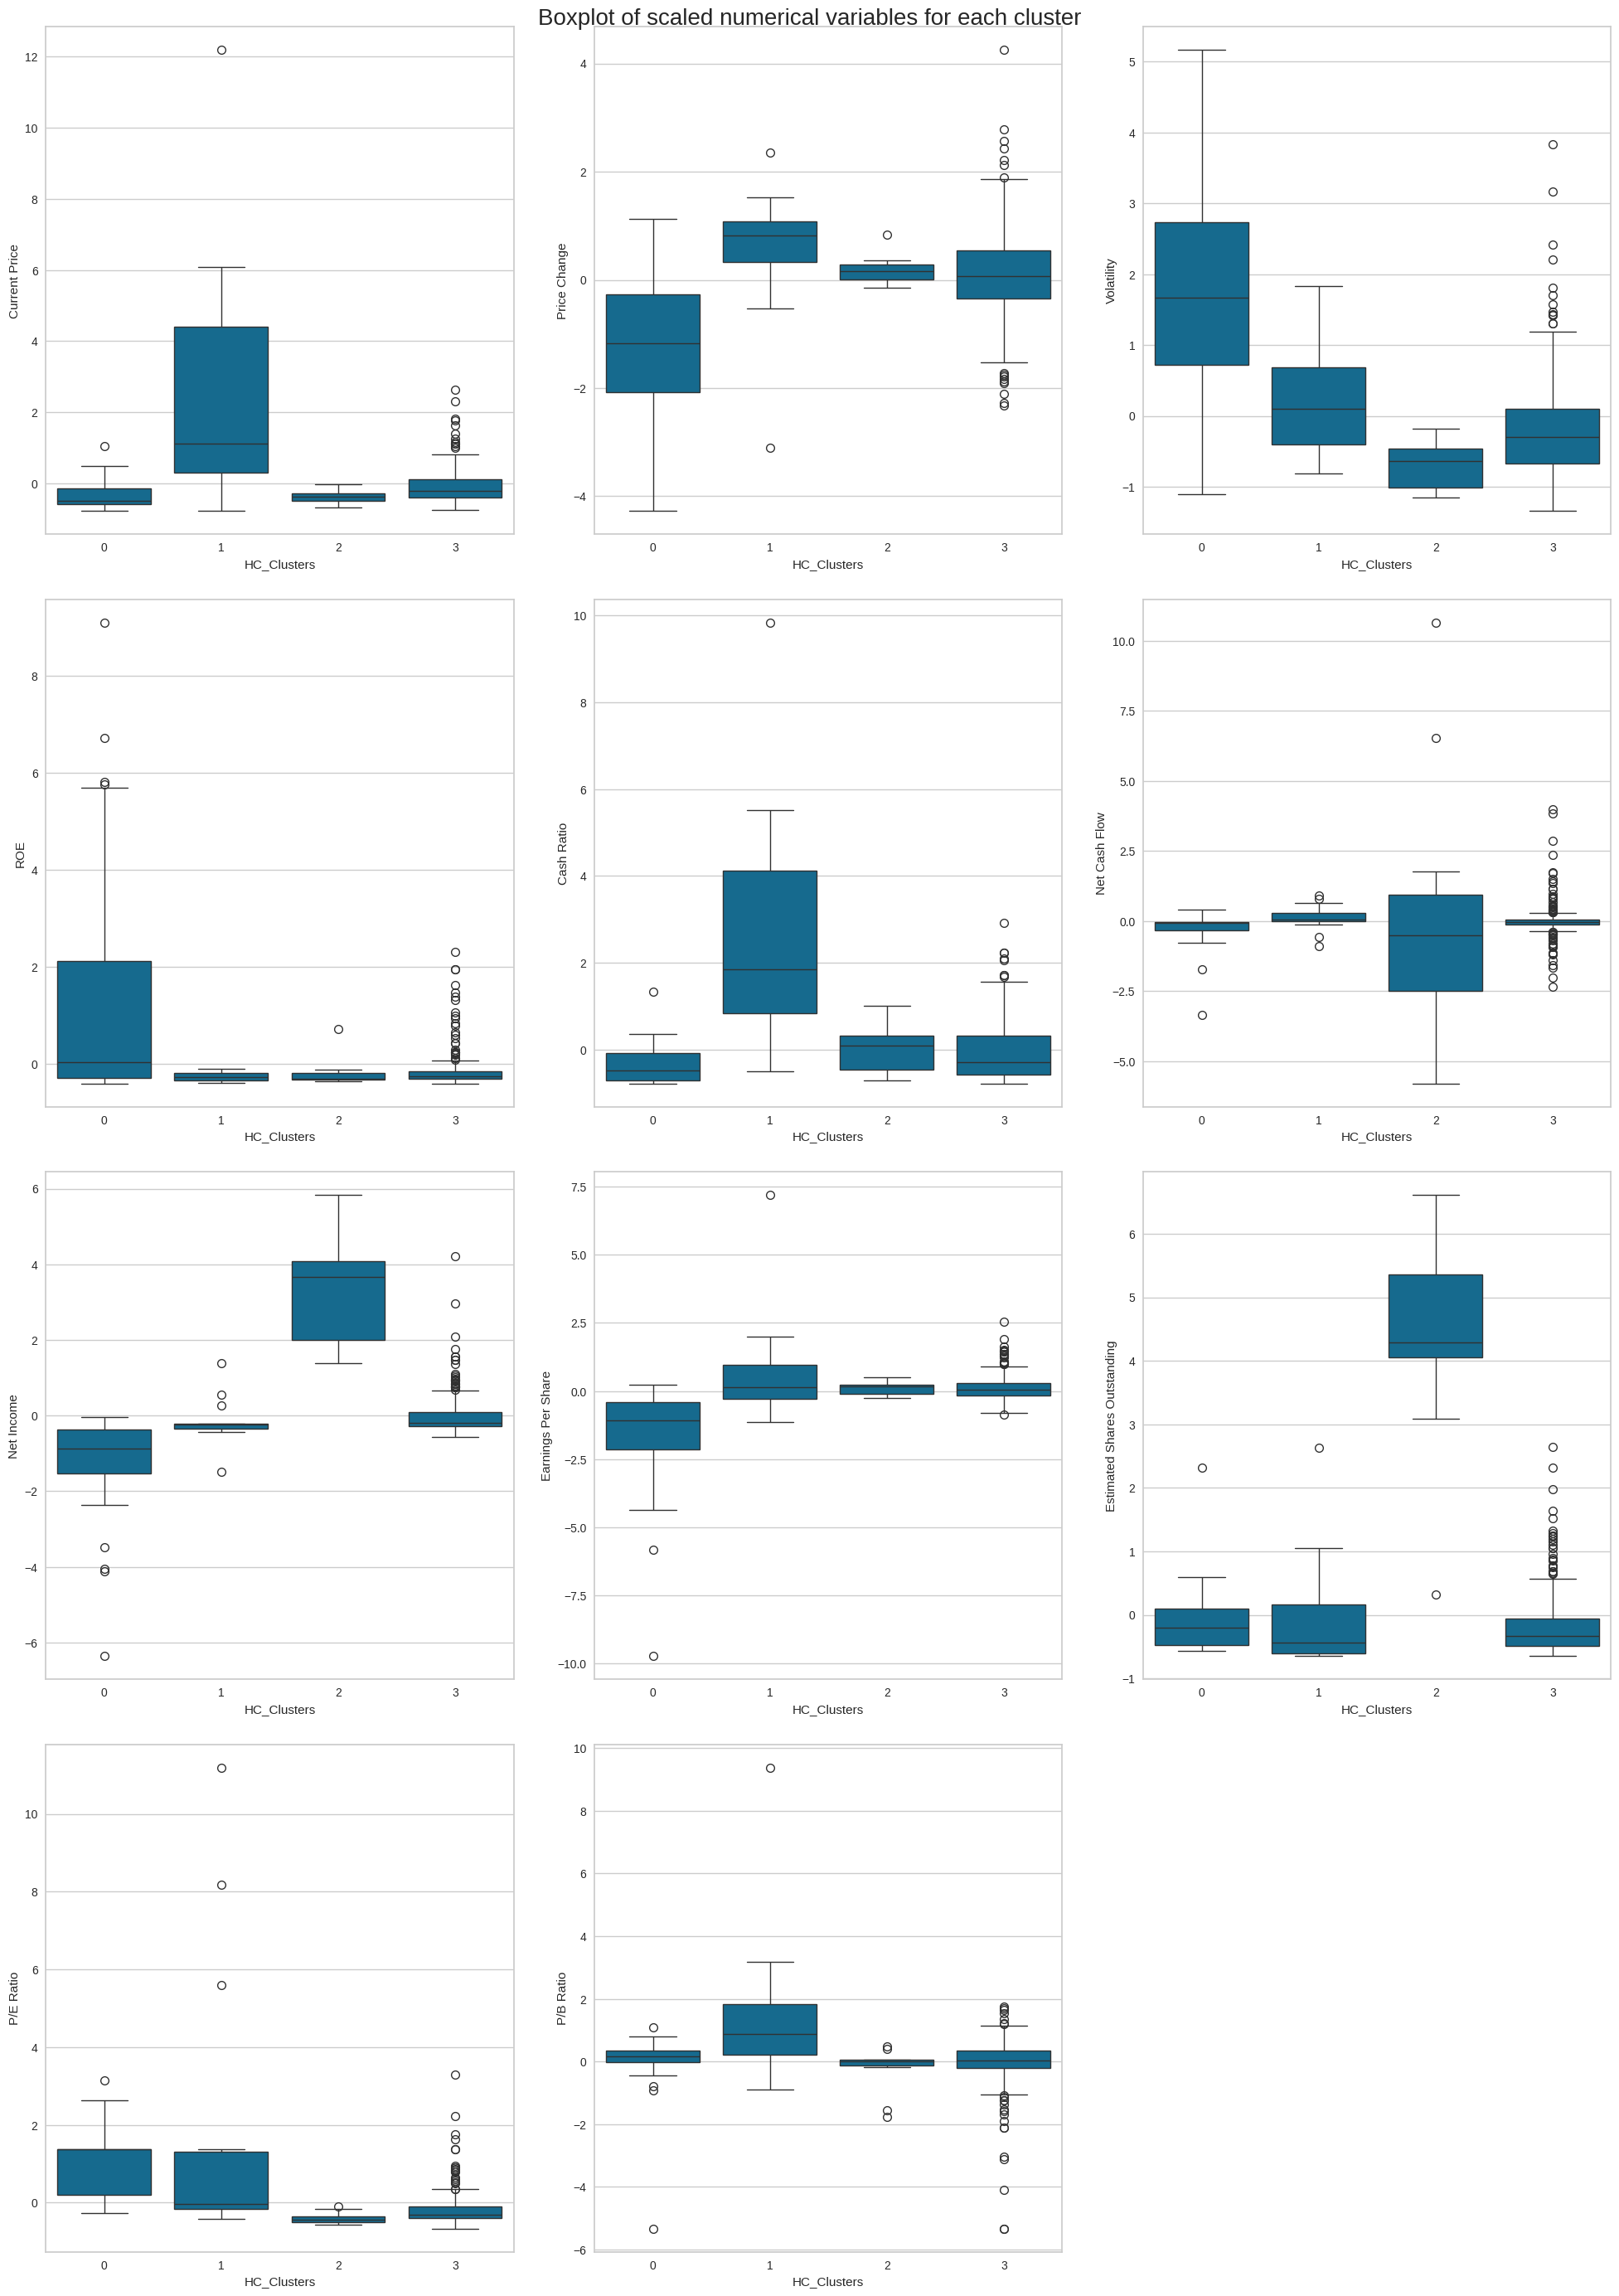

In [102]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

# The original code used 'num_cols' which was not defined.
# It should be 'num_col' which contains numerical column names.
for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=subset_scaled_df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

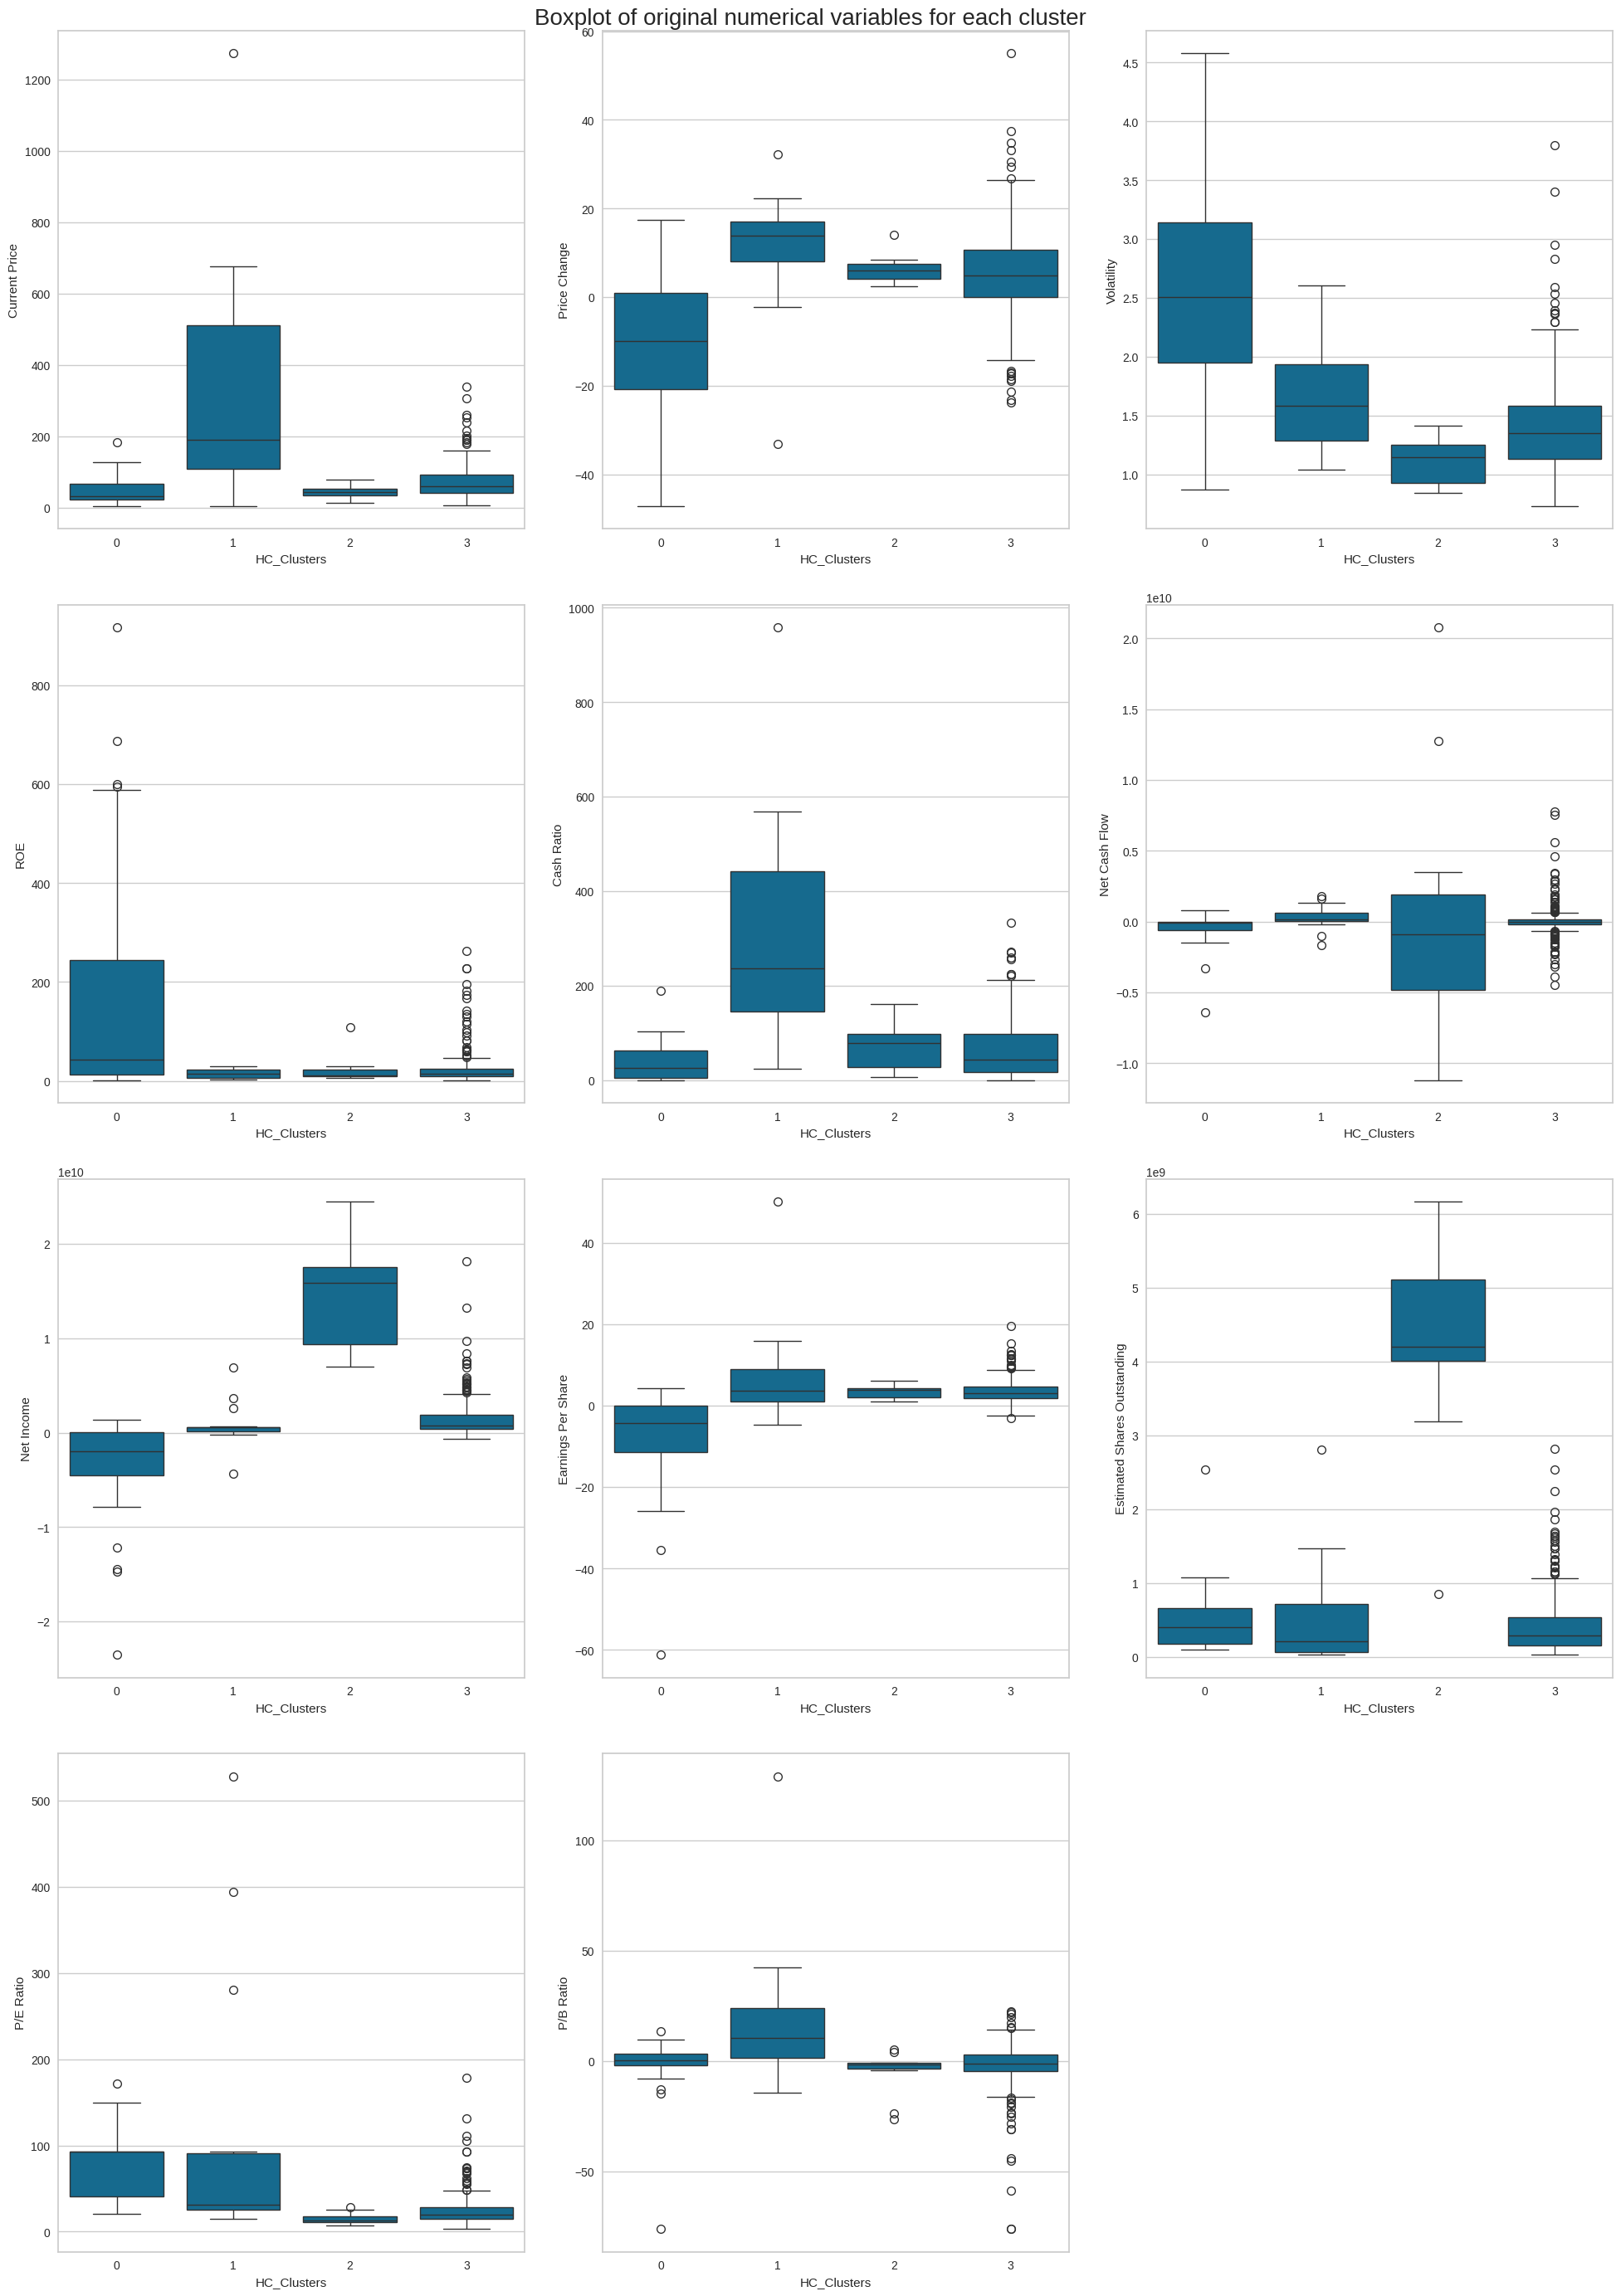

In [104]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [105]:
df.HC_Clusters.value_counts()

HC_Clusters
3    285
0     29
1     15
2     11
Name: count, dtype: int64

In [109]:
numerical_features = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby("HC_Clusters")[numerical_features].mean().round(2)

# Display the results
print(cluster_means)

             Current Price  Price Change  Volatility     ROE  Cash Ratio  \
HC_Clusters                                                                
0                    48.01        -11.26        2.59  196.55       40.28   
1                   326.20         10.56        1.64   14.40      309.47   
2                    42.85          6.27        1.12   22.73       71.45   
3                    72.76          5.21        1.43   25.60       60.39   

             Net Cash Flow    Net Income  Earnings Per Share  \
HC_Clusters                                                    
0            -4.959017e+08 -3.597245e+09               -8.69   
1             2.888507e+08  8.644985e+08                7.79   
2             5.586364e+08  1.463127e+10                3.41   
3             7.995151e+07  1.538594e+09                3.66   

             Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
HC_Clusters                                                       
0                       

##  **Insights**

 **Cluster 0**
* There are 29 GICS Sectors in cluster 0
* Highest values of volatility and ROE are present in this cluster.
* As stocks in this sector have high volatility and negative earnings,its risky to invest in these stocks.
* Negative value of P/B ratio indicates liablities excees the assets, which is very danger.
* Better to avoid or shorten the investment in these stocks.


 **Cluster 1**
* There are 15 GICS Sectors in cluster 1
* There are highest values for Current Price, Price Change,cash ratio, Earnings per share, P/E ratio and P/B ratio.
*These stocks are high earning stocks, we can expect future growth if we invest in the stocks of this cluster.


 **Cluster 2**
* There are 11 GICS Sectors in cluster 2
* Highest values of Net Cash Flow, 	Net Income and estimated share outstanding are present in this cluster.
* These stocks semms to be stable.
* P/B ratio is negative, so we need to analyse it properly before investing in these stocks of this cluster.

**Cluster 3**
* There are Highest number of (285) GICS Sectors in cluster 3
* These are balanced stocks with good returns
* suitable for investors looking for stability and growth.


In [112]:
kmeans_counts = df["K_means_segments"].value_counts().sort_index()
hc_counts = df["HC_Clusters"].value_counts().sort_index()


<Figure size 800x500 with 0 Axes>

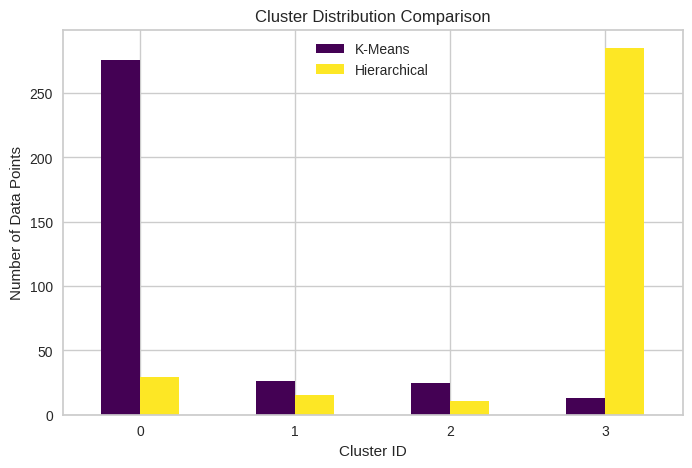

In [113]:
# Plot Cluster Distribution Comparison
plt.figure(figsize=(8,5))
df_counts = pd.DataFrame({'K-Means': kmeans_counts, 'Hierarchical': hc_counts})
df_counts.plot(kind='bar', figsize=(8,5), colormap='viridis')
plt.title("Cluster Distribution Comparison")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=0)
plt.show()


In [119]:
# Compare Cluster Means

# Compare Cluster Means

numerical_features = df.select_dtypes(include=np.number).columns
cluster_means_kmeans = df.groupby("K_means_segments")[numerical_features].mean().round(2)
cluster_means_hc = df.groupby("HC_Clusters")[numerical_features].mean().round(2)
# Display mean statistics for comparison
print("K-Means Cluster Means:\n", cluster_means_kmeans)
print("\nHierarchical Cluster Means:\n", cluster_means_hc)



K-Means Cluster Means:
                   Current Price  Price Change  Volatility     ROE  Cash Ratio  \
K_means_segments                                                                
0                         72.47          5.06        1.39   34.71       52.94   
1                         35.17        -16.39        2.92  110.96       49.46   
2                        238.07         13.51        1.78   25.60      276.28   
3                         48.10          6.05        1.16   27.54       77.23   

                  Net Cash Flow    Net Income  Earnings Per Share  \
K_means_segments                                                    
0                 -1.802103e+07  1.471489e+09                3.63   
1                 -1.923189e+08 -4.041692e+09               -9.85   
2                  7.521954e+08  9.419973e+08                5.89   
3                  7.732308e+08  1.411492e+10                3.96   

                  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  \
K_

## Actionable Insights & Recommendations
* Both clustering techniques identified a group of low-risk, stable companies (Clusters 2 & 3 in K-Means, Clusters 1 & 3 in Hierarchical).

* Both identified high-risk, speculative stocks (Cluster 1 in K-Means, Cluster 0 in Hierarchical).

* K-Means found a small group of highly profitable companies (Cluster 3) that Hierarchical clustering didn’t clearly separate.

* Hierarchical clustering created a distinct cluster (Cluster 2) for firms with very high Net Income, which K-Means didn’t explicitly segment.

## Key takeaways for the business

* Stable & Cash-Rich Companies  are Cluster 2 of K-Means, Cluster 1 & 3
of Hierarchical clustering.
* High-Risk, High-Reward Companies are Cluster 1 of K-Means, Cluster 0 of Hierarchical.
* Steady Growth Companies are Cluster 3 of K-Means, Cluster 2 of Hierarchical.
* Companies with Negative Net Income & Cash Flow are Cluster 1 of K-Means, Cluster 0 of  Hierarchical)
* Companies with Strong Cash Flow but Low ROE are Cluster 2 of K-Means, Cluster 1 of  Hierarchical)
